This is a different way of encoding integer QUBOs in Rydberg-atom graphs [1].

[1] Byun, Andrew, Junwoo Jung, Kangheun Kim, Minhyuk Kim, Seokho Jeong, Heejeong Jeong, and Jaewook Ahn. 2024. “Rydberg-Atom Graphs for Quadratic Unconstrained Binary Optimization Problems.” Advanced Quantum Technologies 7 (8): 2300398. https://doi.org/10.1002/qute.202300398.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from networkx import gnm_random_graph
from scipy.optimize import minimize
from scipy.spatial.distance import pdist, squareform

from qubovert.utils import solve_qubo_bruteforce as qubo_solver


import pulser
from pulser import Pulse, Sequence, Register
from pulser_simulation import QutipEmulator
from pulser.devices import DigitalAnalogDevice, MockDevice  
from pulser.waveforms import InterpolatedWaveform, BlackmanWaveform

import sys
sys.path.append('..')

from source.qubo import solve_qubo_bruteforce, plot_distribution, anneal, draw_solutions, evaluate_mapping, get_Q_from_coords, get_register_embedding
from source.qubovert_custom import problem_to_qubo_matrix
from source.helpers import matprint
from itertools import combinations

from dataclasses import replace

from pulser.channels.dmm import DMM
from pulser.devices import AnalogDevice
from pulser.register import Register
from pulser.register.register_layout import RegisterLayout
from pulser.register.mappable_reg import MappableRegister
from pulser.register.weight_maps import DetuningMap
from pulser.sampler import sampler
from pulser.sequence import Sequence
from pulser.pulse import Pulse
from pulser.waveforms import ConstantWaveform, RampWaveform
from pulser.waveforms import InterpolatedWaveform
from pulser_simulation import QutipEmulator

In [54]:
def f3(x1, x2):
    """
    QUBO function to be minimized.
    """
    return -2*x1 + x2 + x1 * x2

def f4(x1, x2):
    """
    QUBO function to be minimized.
    """
    return -2*x1 + x2 - x1 * x2

![Screenshot 2025-03-31 185426.png](<attachment:Screenshot 2025-03-31 185426.png>)
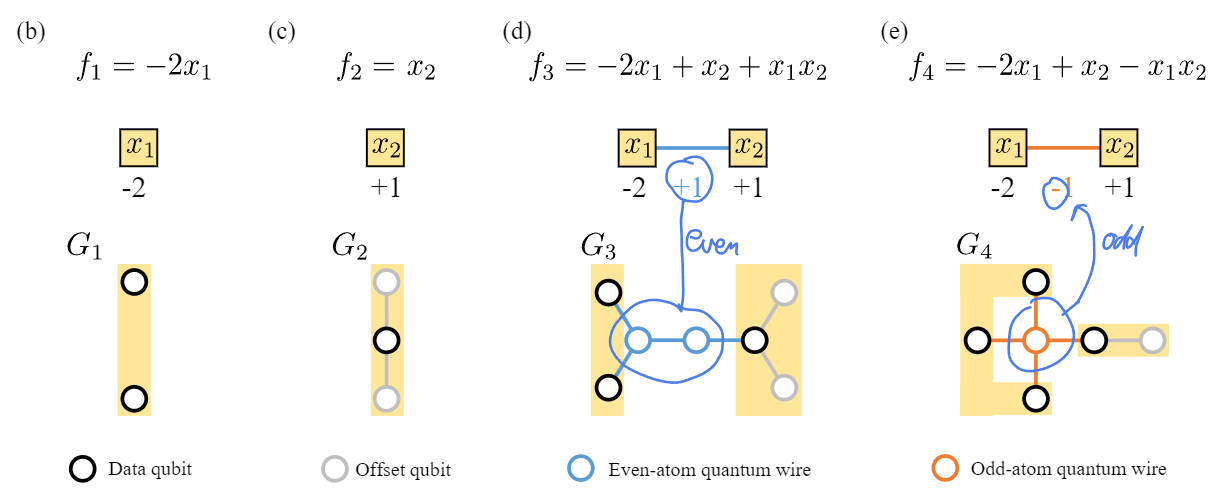

Pulse integral: 3.140021465031


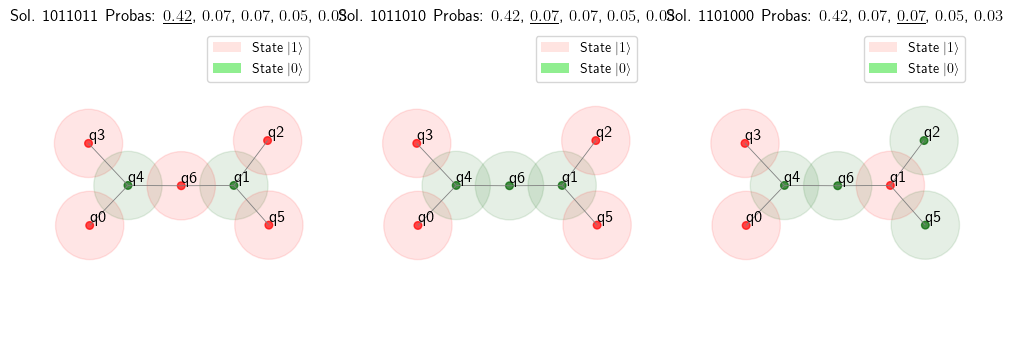

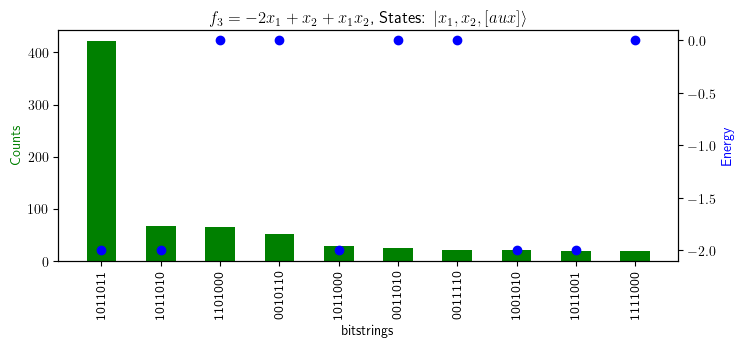

In [67]:
coords = [
  (-8.363368778026842, -9.302635019474577),
  (19.620020369161537, -1.5374102400174592),
  (26.155738266716078, 7.175534632716036),
  (-8.591421996152766, 6.624176529448907),
  (-0.9364982088335663, -1.5370278113829174),
  (26.407062217340066, -9.235825376478033),
  (9.399998474121093, -1.5974344398448128),
]

qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

T = 2000
Omega = 1.5*np.pi * 1000./T
delta_i = -4.
delta_f = -delta_i
counts = anneal(reg, Omega, delta_i, delta_f, T=T, draw_distribution=False)
draw_solutions(reg, counts, n=3, draw_graph=True)

values = [(int(c[0][0]), int(c[0][1])) for c in counts.most_common()]
values = [f3(x1, x2) for (x1, x2) in values]

# Plot the distribution of the values

n_max_states = 10
plot_distribution(counts, [], show=False, n_max_states=n_max_states)
plt.ylabel("Counts", color="green")
plt.twinx()
plt.ylabel("Energy", color="blue")
plt.scatter(np.arange(len(values))[:n_max_states], values[:n_max_states], c="blue")
plt.title(r"$f_3=-2x_1+x_2+x_1x_2$,  States: $|x_1, x_2, [aux] \rangle$")
plt.show()

Pulse integral: 3.140021465031


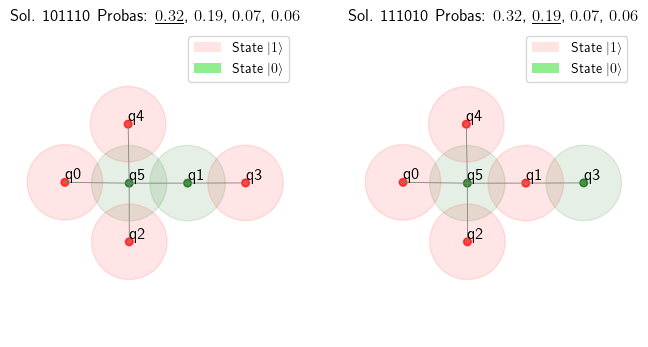

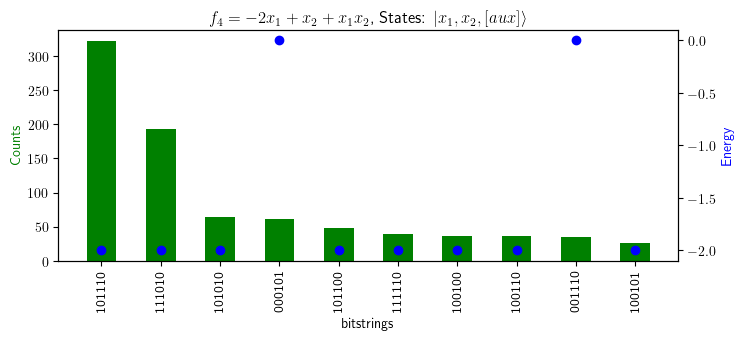

In [68]:
coords = [
(-11.766667175292968, 3.6666671752929685),
(9.768206564491628, 3.531162471696735),
(-0.46666870117187553, -6.766668701171875),
(19.933334350585934, 3.5666656494140625),
(-0.6666656494140626, 13.866666412353515),
(-0.48912369739855643, 3.5183832063316665),
]

qubits = {f"q{i}": coord for (i, coord) in enumerate(coords)}
reg = Register(qubits)

T = 2000
Omega = 1.5*np.pi * 1000./T
delta_i = -4.
delta_f = -delta_i
counts = anneal(reg, Omega, delta_i, delta_f, T=T, draw_distribution=False)
draw_solutions(reg, counts, n=2, draw_graph=True)

values = [(int(c[0][0]), int(c[0][1])) for c in counts.most_common()]
values = [f4(x1, x2) for (x1, x2) in values]

# Plot the distribution of the values

n_max_states = 10
plot_distribution(counts, [], show=False, n_max_states=n_max_states)
plt.ylabel("Counts", color="green")
plt.twinx()
plt.ylabel("Energy", color="blue")
plt.scatter(np.arange(len(values))[:n_max_states], values[:n_max_states], c="blue")
plt.title(r"$f_4=-2x_1+x_2+x_1x_2$,  States: $|x_1, x_2, [aux] \rangle$")
plt.show()

In [72]:
def f5(x1, x2):
    """
    QUBO function to be minimized.
    """
    return -2*x1 + x2 + 2* x1 * x2

Pulse integral: 3.1408071585540003


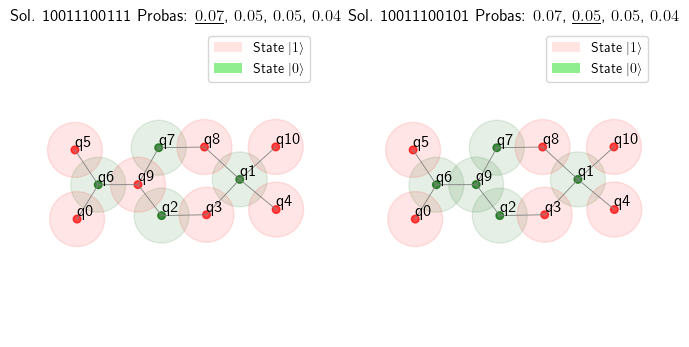

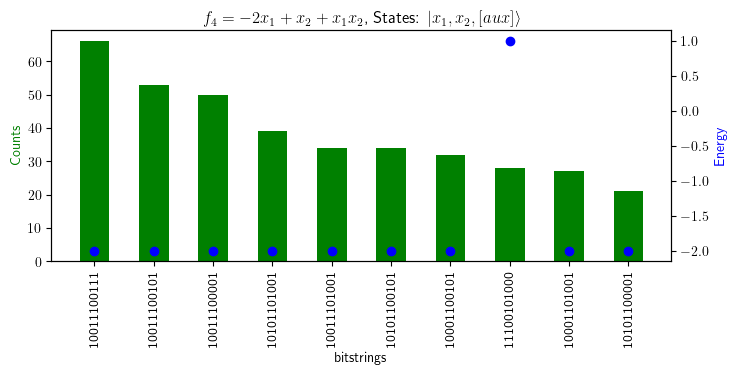

In [86]:
qubits = {
  "q0": (-8.47819516473824, -8.306061459008077),
  "q1": (30.73487766181274, 1.2627146014886819),
  "q2": (11.898529662740815, -7.465054495366078),
  "q3": (22.724632186364634, -7.259052343131209),
  "q4": (39.51881305031749, -6.006877626787111),
  "q5": (-8.998450953445188, 8.369429979956738),
  "q6": (-3.37815905480985, -0.02550950902835991),
  "q7": (11.191092719588736, 8.900305344351857),
  "q8": (22.236628919440925, 9.067519983955082),
  "q9": (6.209066728236552, 0.0032993796803495457),
  "q10": (39.416714052267906, 9.09281849678641),
} 
reg = Register(qubits)

T = 4000
Omega = 1.5*np.pi * 1000./T
delta_i = -2.
delta_f = -delta_i
counts = anneal(reg, Omega, delta_i, delta_f, T=T, draw_distribution=False)
draw_solutions(reg, counts, n=2, draw_graph=True)

values = [(int(c[0][0]), int(c[0][1])) for c in counts.most_common()]
values = [f5(x1, x2) for (x1, x2) in values]

# Plot the distribution of the values

n_max_states = 10
plot_distribution(counts, [], show=False, n_max_states=n_max_states)
plt.ylabel("Counts", color="green")
plt.twinx()
plt.ylabel("Energy", color="blue")
plt.scatter(np.arange(len(values))[:n_max_states], values[:n_max_states], c="blue")
plt.title(r"$f_4=-2x_1+x_2+x_1x_2$,  States: $|x_1, x_2, [aux] \rangle$")
plt.show()